# Visualización
  El objetivo de esta visualización según el DataSet, desde lo Macro a lo Micro, del comportamiento de la adopción de la electromovilidad en el mundo, LATAM y Chile

#### Importación, filtrado y creación de variable auxiliar del dataset

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Especifica la ruta al archivo CSV
file_path = '../Data/IEAGlobalEVData2024.csv'

# Lee el archivo CSV
df = pd.read_csv(file_path)
# Filtro de solo datos historicos
df_h=df[df['category'] == 'Historical']
# Eliminación de datos relacionados al desplazamiento de petroleo
df_h = df_h[~df_h['parameter'].isin(['Oil displacement Mbd', 'Oil displacement, million lge'])]
# Crear un diccionario que mapea cada país a su región
region_map = {
    'World': 'Global',
    'Europe': 'Global',
    'China': 'Asia',
    'Rest of the world': 'Global',
    'USA': 'North America',
    'India': 'Asia',
    'EU27': 'Global',
    'Netherlands': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Japan': 'Asia',
    'Switzerland': 'Europe',
    'Spain': 'Europe',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Korea': 'Asia',
    'Finland': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'New Zealand': 'Oceania',
    'Brazil': 'Latam',
    'Israel': 'Asia',
    'Austria': 'Europe',
    'Iceland': 'Europe',
    'Chile': 'Latam',
    'Australia': 'Oceania',
    'Mexico': 'Latam',
    'Greece': 'Europe',
    'South Africa': 'Africa',
    'Turkiye': 'Asia',
    'Latvia': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'Colombia': 'Latam',
    'Costa Rica': 'Latam',
    'Bulgaria': 'Europe',
    'Estonia': 'Europe',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Slovakia': 'Europe',
    'Romania': 'Europe',
    'Lithuania': 'Europe',
    'Seychelles': 'Africa',
    'United Arab Emirates': 'Asia',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Thailand': 'Asia',
    'Cyprus': 'Europe',
    'Indonesia': 'Asia'
}

# Crear la nueva columna 'region_category' en el DataFrame
df_h['region_category'] = df_h['region'].map(region_map)



## Analisis por Regiones

### Estado de Vehículos Eléctricos por Continente

Del grafico se puede desprender que el principal desarrollo de la electromovilidad este concentrado en Asia y Europa, con Latam muy por detrás de los otros bloques de países. Se observa que la gran fuerza de desarrollo de la electromovilidad está asociada a la venta de autos por sobre otros tipos.

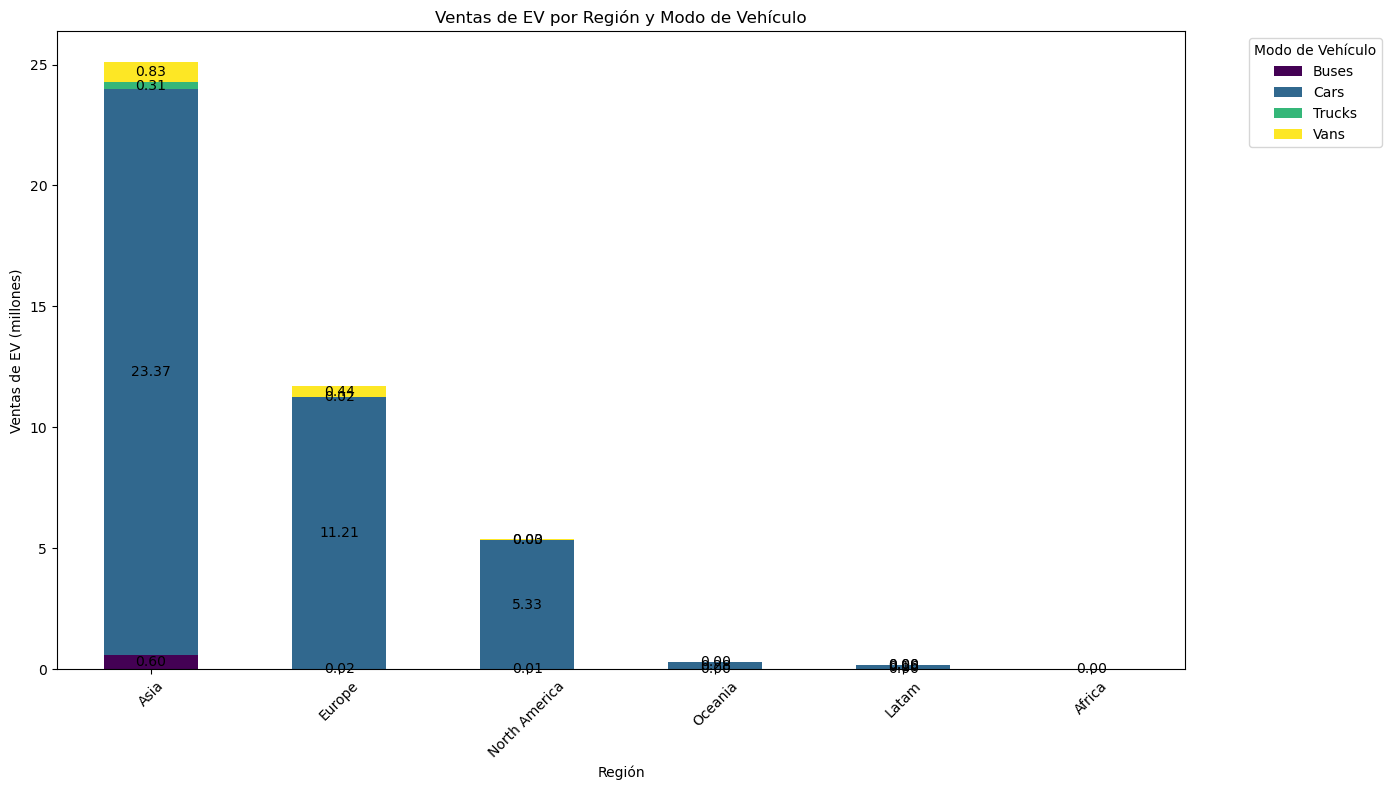

In [114]:
# Filtrar los datos para EV sales y excluir las categorías globales
filtered_ev_sales = df_h[(df_h['parameter'] == 'EV sales') & (df_h['region_category'] != 'Global')]

# Agrupar los datos por 'region_category' y 'mode', y sumar las ventas
ev_sales_by_region_mode = filtered_ev_sales.groupby(['region_category', 'mode'])['value'].sum().reset_index()

# Convertir las ventas a millones
ev_sales_by_region_mode['value'] = ev_sales_by_region_mode['value'] / 1_000_000

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_pivot = ev_sales_by_region_mode.pivot(index='region_category', columns='mode', values='value').fillna(0)

# Ordenar las regiones por las ventas totales
ev_sales_pivot = ev_sales_pivot.loc[ev_sales_pivot.sum(axis=1).sort_values(ascending=False).index]

# Crear el gráfico de barras apiladas
ax = ev_sales_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV por Región y Modo de Vehículo')
plt.xlabel('Región')
plt.ylabel('Ventas de EV (millones)')
plt.xticks(rotation=45)
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Añadir las anotaciones de los valores en el gráfico
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

### Evolución de la electromovilidad en el tiempo por Región:

El siguiente gráfico muestra el crecimiento que ha experimentado la electromovilidad en los últimos años, donde se aprecia un aumento significativo los últimos 4 años.

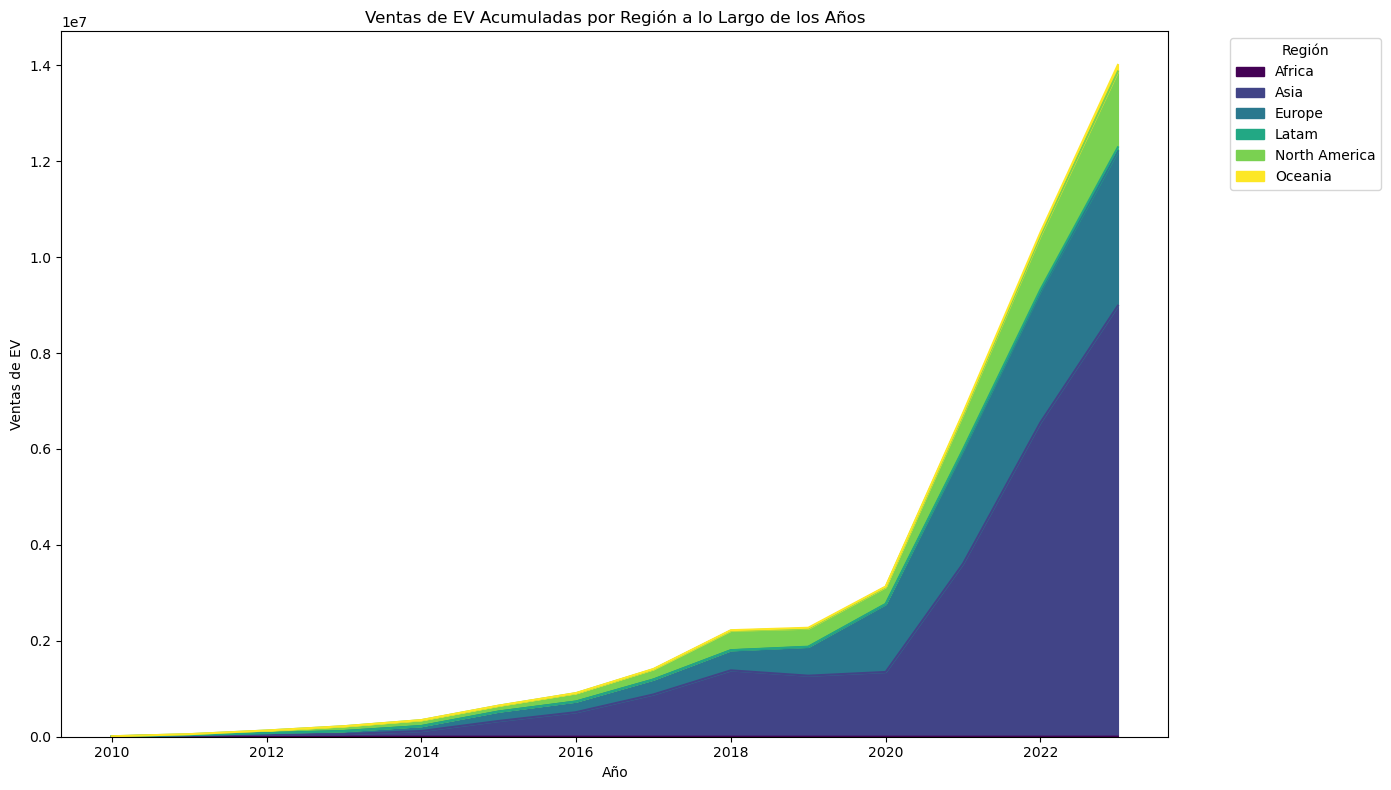

In [21]:
# Agrupar los datos por 'region_category' y 'year', y sumar las ventas
ev_sales_by_region_year = filtered_ev_sales.groupby(['region_category', 'year'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_pivot = ev_sales_by_region_year.pivot(index='year', columns='region_category', values='value').fillna(0)

# Crear el gráfico de área apilado
ev_sales_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV Acumuladas por Región a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de EV')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Electromovilidad en Latino America
### Crecimiento en el tiempo de la electromovilidad en latino américa:


El siguiente grafico muestra la tendencia de los últimos años de la compra de vehículos eléctricos en Latam, con un despegue significativo los últimos 3 años.

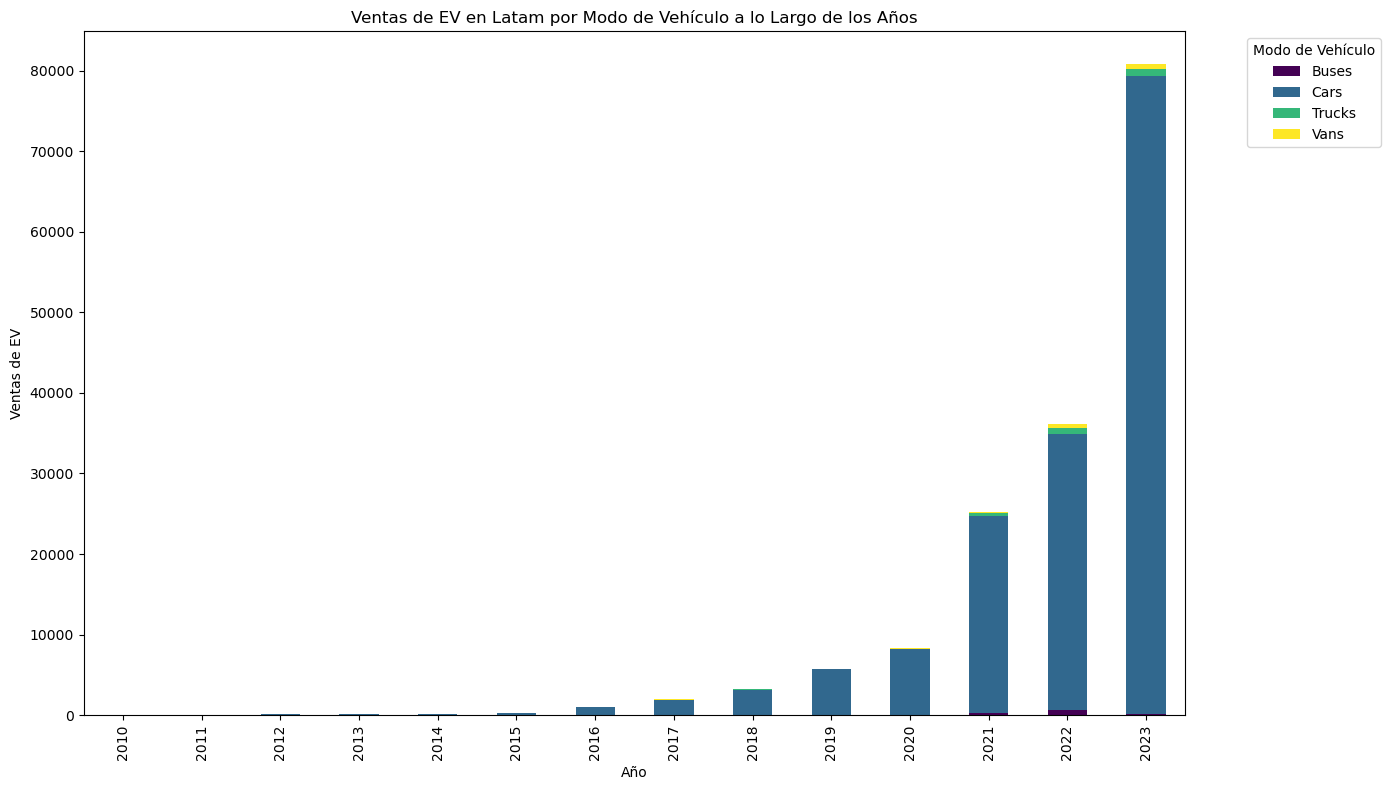

In [268]:
# Filtrar los datos para EV sales, excluir las categorías globales, y seleccionar solo 'Latam'
filtered_ev_sales_latam = df_h[(df_h['parameter'] == 'EV sales') & 
                               (df_h['region_category'] == 'Latam')]

# Agrupar los datos por 'year' y 'mode', y sumar las ventas
ev_sales_latam_by_year_mode = filtered_ev_sales_latam.groupby(['year', 'mode'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_pivot = ev_sales_latam_by_year_mode.pivot(index='year', columns='mode', values='value').fillna(0)

# Crear el gráfico de barras apiladas
ev_sales_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de EV en Latam por Modo de Vehículo a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de EV')
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Si analizamos cuales son los países que más peso de electromovilidad en Latinoamérica, podemos ver que los 5 principales son Brasil, México, Costa Rica y Chile. La adopción de la electromovilidad esta principalmente en los autos por sobre otro tipo de vehículo.

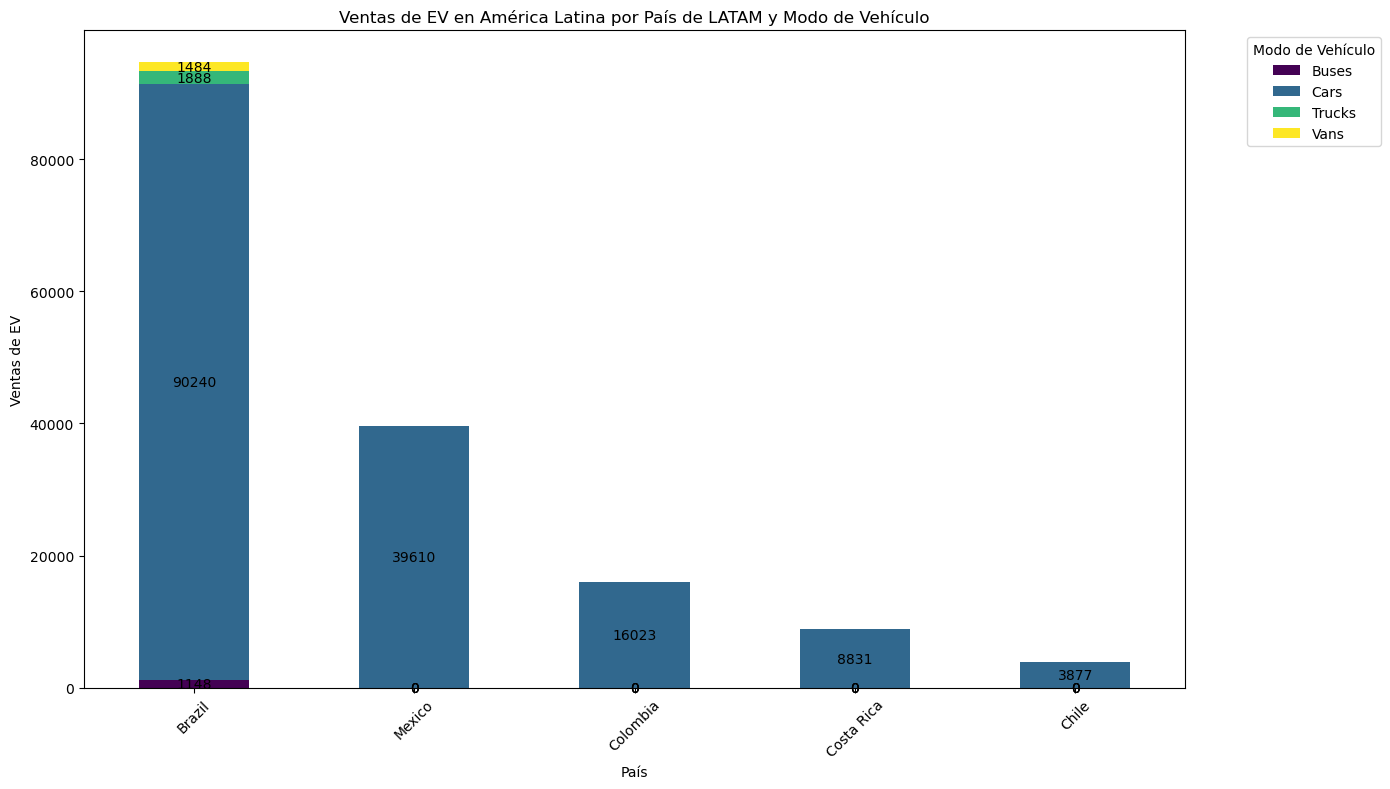

In [271]:
# Agrupar los datos por país y modo, y sumar las ventas
ev_sales_latam_by_country_mode = filtered_ev_sales_latam.groupby(['region', 'mode'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_pivot = ev_sales_latam_by_country_mode.pivot(index='region', columns='mode', values='value').fillna(0)

# Ordenar los países por las ventas totales
ev_sales_latam_pivot['Total'] = ev_sales_latam_pivot.sum(axis=1)
ev_sales_latam_pivot = ev_sales_latam_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Crear el gráfico de barras apiladas
ax = ev_sales_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Personalizar el gráfico
plt.title('Ventas de EV en América Latina por País de LATAM y Modo de Vehículo')
plt.xlabel('País')
plt.ylabel('Ventas de EV')
plt.xticks(rotation=45)
plt.legend(title='Modo de Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Si queremos conocer cómo se distribuyen el total de vehículos eléctricos en Latam, vemos que un poco más del 51% son vehículos híbridos enchufables y el 48,6% corresponde a vehículos full eléctricos.

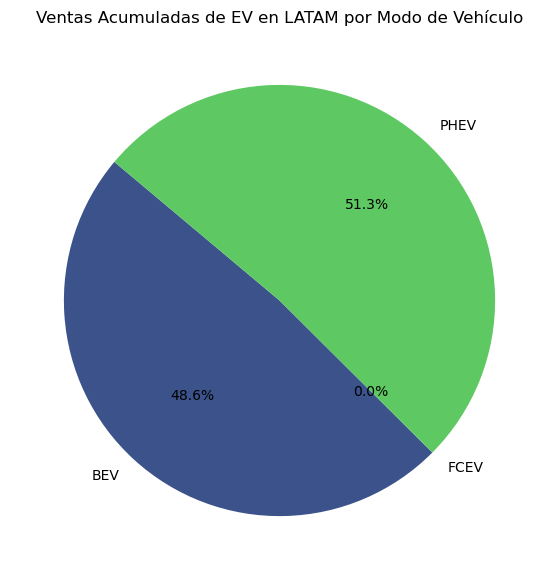

In [273]:

# Agrupar los datos por 'mode' y sumar las ventas totales
ev_sales_latam_by_mode = filtered_ev_sales_latam.groupby('powertrain')['value'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(ev_sales_latam_by_mode['value'], labels=ev_sales_latam_by_mode['powertrain'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(ev_sales_chile_by_mode)))

# Personalizar el gráfico
plt.title('Ventas Acumuladas de EV en LATAM por Modo de Vehículo')
plt.show()

Podemos identificar la misma tendencia de proporción de tipo de vehículos por país, a excepción de Costa Rica, donde el mayor porcentaje corresponde a Vehículos Full Eléctricos

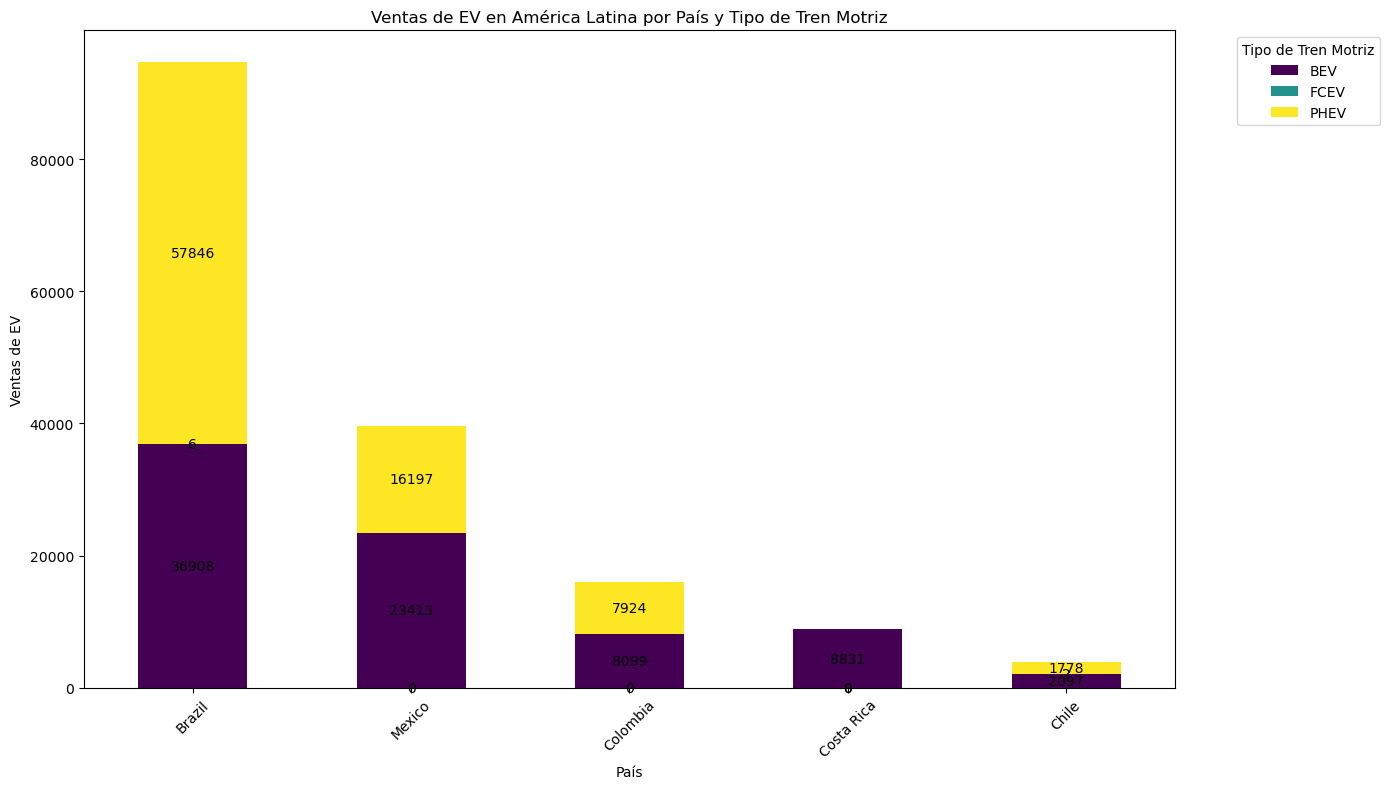

In [275]:
# Agrupar los datos por país y powertrain, y sumar las ventas
ev_sales_latam_by_country_powertrain = filtered_ev_sales_latam.groupby(['region', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_pivot = ev_sales_latam_by_country_powertrain.pivot(index='region', columns='powertrain', values='value').fillna(0)

# Ordenar los países por las ventas totales
ev_sales_latam_pivot['Total'] = ev_sales_latam_pivot.sum(axis=1)
ev_sales_latam_pivot = ev_sales_latam_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Crear el gráfico de barras apiladas
ax = ev_sales_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Personalizar el gráfico
plt.title('Ventas de EV en América Latina por País y Tipo de Tren Motriz')
plt.xlabel('País')
plt.ylabel('Ventas de EV')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Tren Motriz', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Para un análisis visual del crecimiento de los vehículos eléctricos full electicos en la región, se puede identificar en el grafico la fuerza que ha tenido la electromovilidad los últimos años especialmente en Brasil y México.

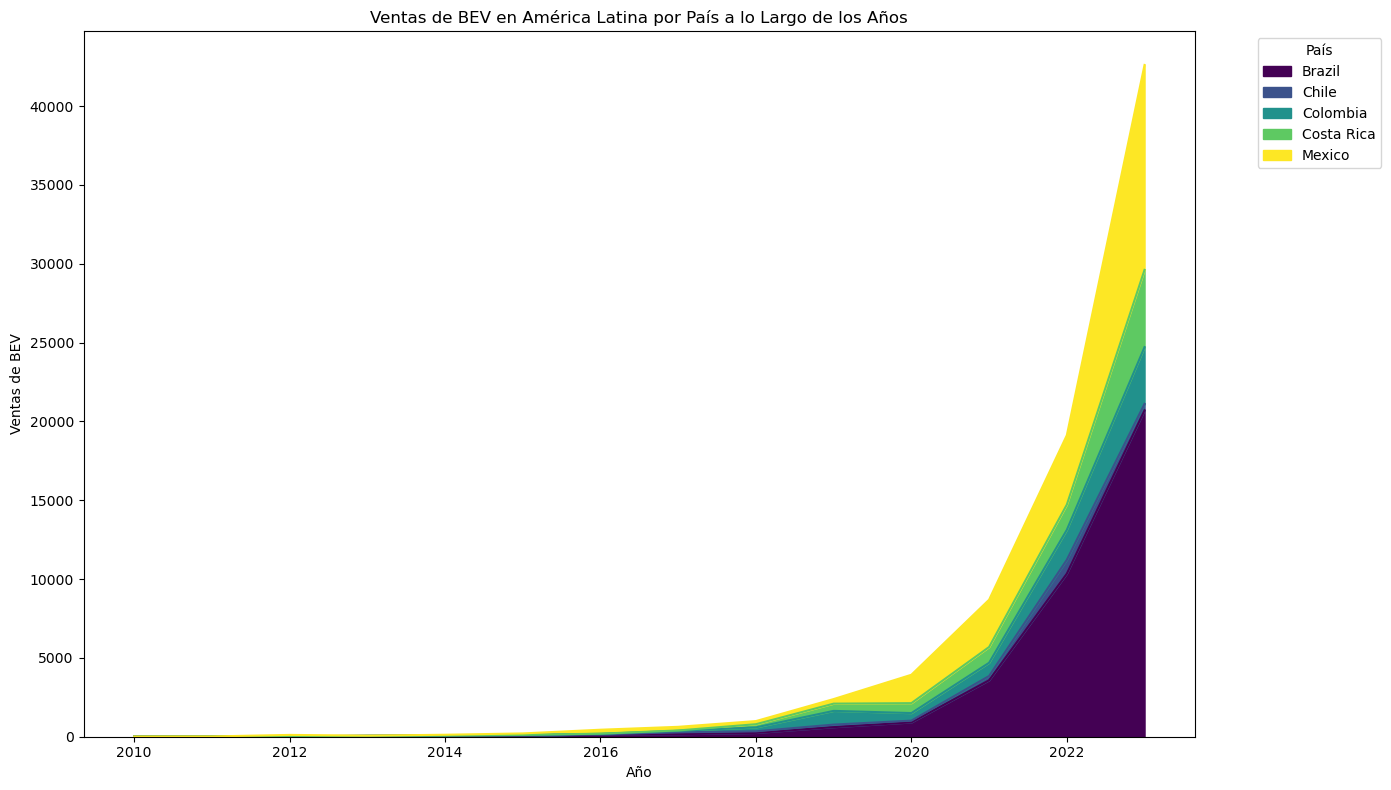

In [37]:
# Filtrar los datos para EV sales con powertrain BEV en Latam
filtered_ev_sales_latam_bev = df_h[(df_h['parameter'] == 'EV sales') & 
                                   (df_h['region_category'] == 'Latam') & 
                                   (df_h['powertrain'] == 'BEV')]

# Agrupar los datos por año y país, y sumar las ventas
ev_sales_latam_bev_by_year_country = filtered_ev_sales_latam_bev.groupby(['year', 'region'])['value'].sum().reset_index()

# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_sales_latam_bev_pivot = ev_sales_latam_bev_by_year_country.pivot(index='year', columns='region', values='value').fillna(0)

# Crear el gráfico de área apilado
ev_sales_latam_bev_pivot.plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis')

# Personalizar el gráfico
plt.title('Ventas de BEV en América Latina por País a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Ventas de BEV')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Infraestructura de Carga en LATAM

Para que exista un crecimiento armónico de la electromovilidad, debe también existir un desarrollo de la infraestructura de carga. En el siguiente grafico se observa que la IEA posee principalmente información de 3 países, donde si bien México y Brasil tienen un amplio desarrollo de la infraestructura de recarga, principalmente es del tipo carga lenta. En cambio, si observamos los datos de Chile, presenta mayor desarrollo de la infraestructura rápida por sobre los otros dos países.

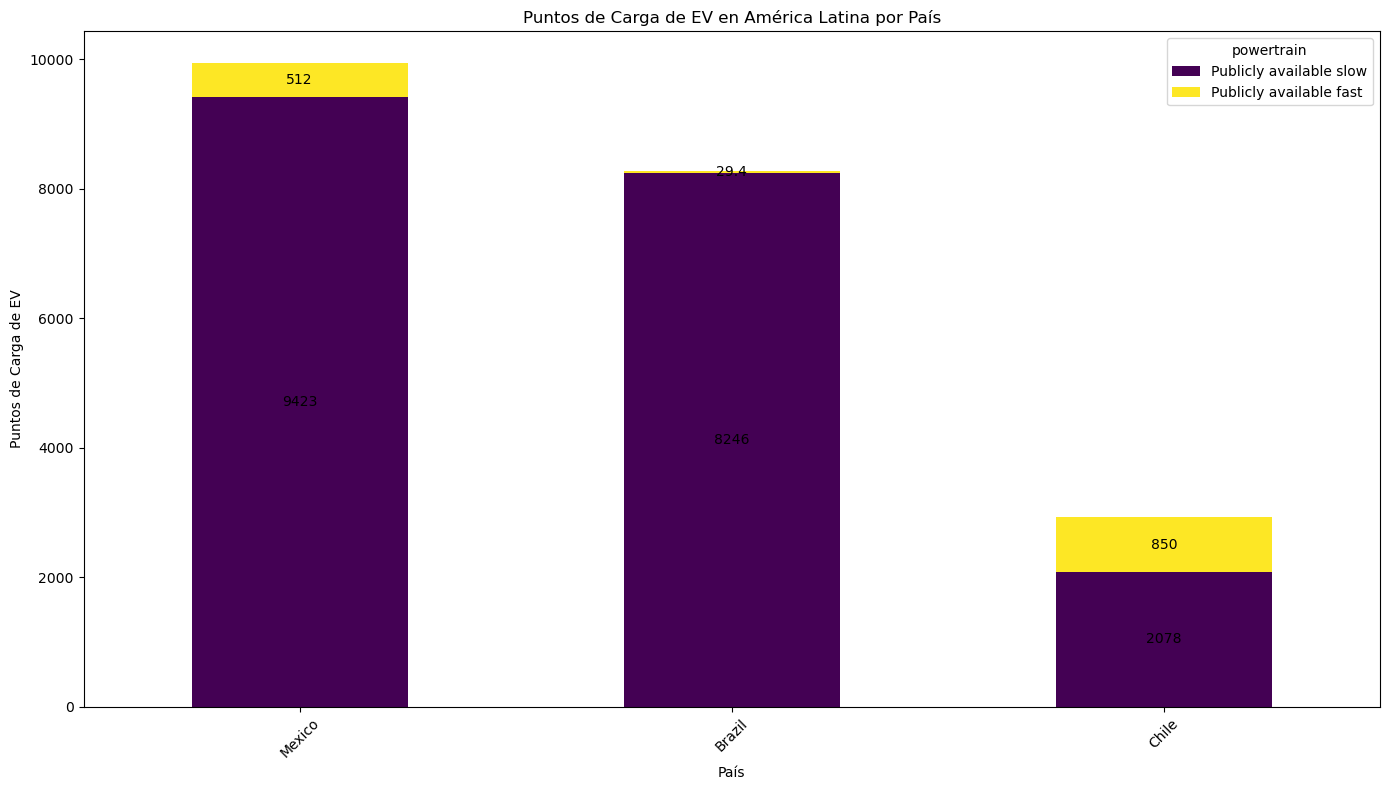

In [277]:
# Filtrar los datos para EV charging points en Latam
filtered_ev_charging_latam = df_h[(df_h['parameter'] == 'EV charging points') & 
                                  (df_h['region_category'] == 'Latam')]

# Agrupar los datos por país y año, y sumar los puntos de carga
ev_charging_latam_by_country = filtered_ev_charging_latam.groupby(['region', 'powertrain'])['value'].sum().reset_index()


# Pivotar los datos para preparar el formato necesario para el gráfico apilado
ev_charging_latam_pivot = ev_charging_latam_by_country.pivot(index='region', columns='powertrain', values='value').fillna(0)


# Ordenar los países por las ventas totales
ev_charging_latam_pivot['Total'] = ev_charging_latam_pivot.sum(axis=1)
ev_charging_latam_pivot = ev_charging_latam_pivot.sort_values(by='Total', ascending=False).drop(columns='Total')

# Reordenar las columnas para que los valores menores estén arriba
ev_charging_latam_pivot = ev_charging_latam_pivot[ev_charging_latam_pivot.sum().sort_values(ascending=False).index]


# Crear el gráfico de barras apiladas
ax = ev_charging_latam_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir valores en las columnas
for container in ax.containers:
    ax.bar_label(container, label_type='center')


# Personalizar el gráfico
plt.title('Puntos de Carga de EV en América Latina por País')
plt.xlabel('País')
plt.ylabel('Puntos de Carga de EV')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Tendencia de la electromovilidad en Chile
### Comportamiento del crecimiento de la electromovilidad.

La venta acumulada hasta el 2023 a tenido un comportamiento diferente a la tendencia de Latam, donde principalmente la adquisición de vehículos eléctricos en Chile, son del tipo full eléctrico.

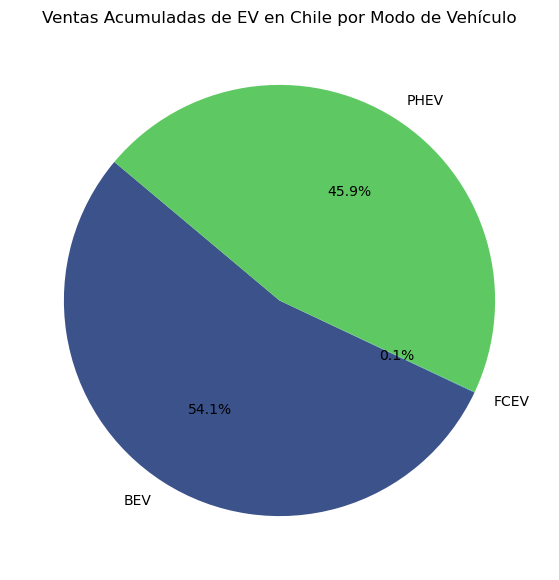

In [185]:
# Filtrar los datos para EV sales en Chile
filtered_ev_sales_chile = df_h[(df_h['parameter'] == 'EV sales') & (df_h['region'] == 'Chile')]


# Agrupar los datos por 'mode' y sumar las ventas totales
ev_sales_chile_by_mode = filtered_ev_sales_chile.groupby('powertrain')['value'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(ev_sales_chile_by_mode['value'], labels=ev_sales_chile_by_mode['powertrain'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(ev_sales_chile_by_mode)))

# Personalizar el gráfico
plt.title('Ventas Acumuladas de EV en Chile por Modo de Vehículo')
plt.show()


El siguiente grafico muestra como ha sido el comportamiento de las ventas por año de vehículos eléctricos en Chile, donde si bien se ve un aumento de las ventas los últimos años, el año 2023 presento una desaceleración tanto en vehículos full eléctricos como híbridos enchufables.

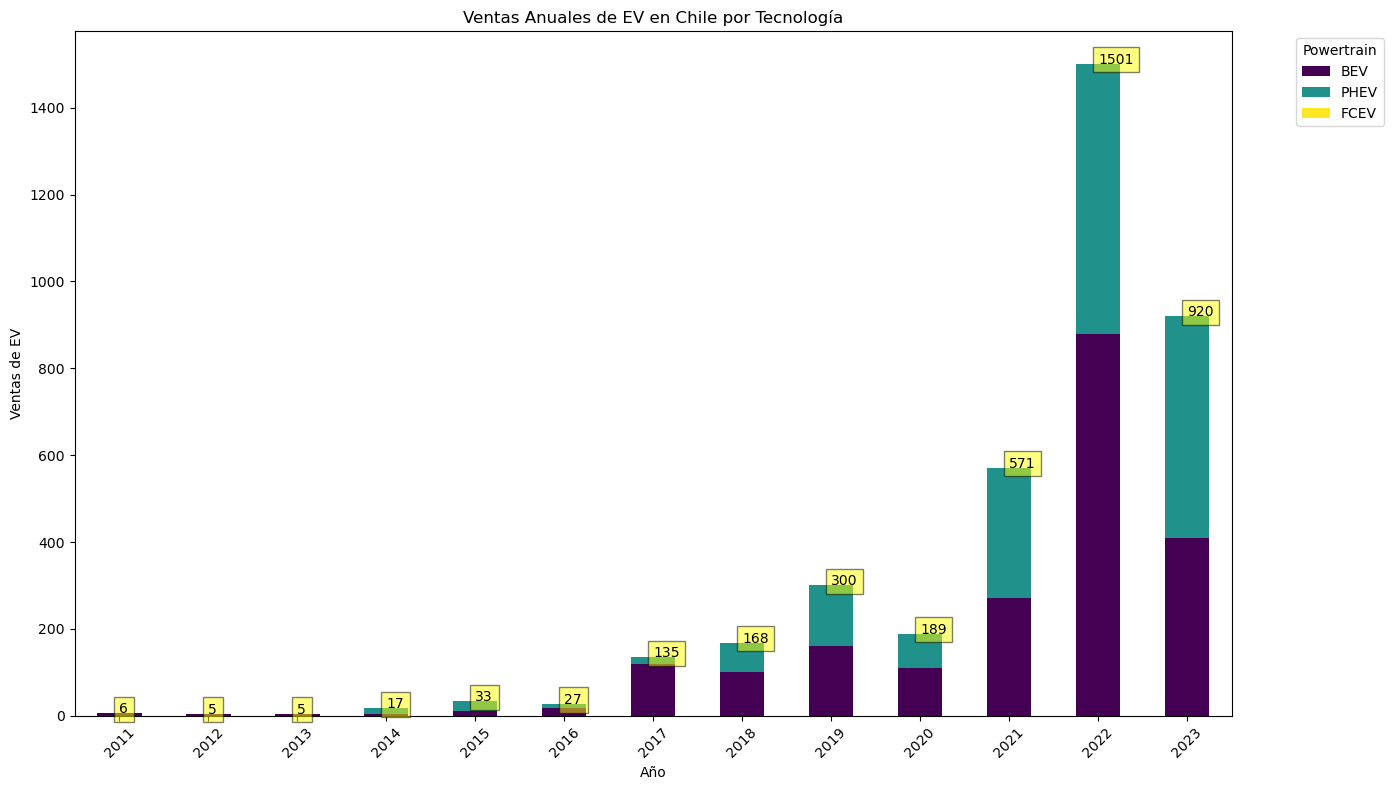

In [279]:
# Agrupar los datos por año y powertrain, y sumar los valores
ev_sales_chile_by_year_powertrain = filtered_ev_sales_chile.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para que las columnas representen los diferentes powertrains
ev_sales_chile_pivot = ev_sales_chile_by_year_powertrain.pivot(index='year', columns='powertrain', values='value').fillna(0)

# Ordenar las columnas para que el mayor valor acumulado esté abajo y el menor arriba
final_values = ev_sales_chile_pivot.sum().sort_values(ascending=False)
ev_sales_chile_pivot = ev_sales_chile_pivot[final_values.index]

# Crear el gráfico de barras apiladas
ax = ev_sales_chile_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir etiquetas del valor total por año
totals = ev_sales_chile_pivot.sum(axis=1)
for i in range(len(totals)):
    plt.text(x=i, y=totals.iloc[i], s=str(int(totals.iloc[i])), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Ventas Anuales de EV en Chile por Tecnología')
plt.xlabel('Año')
plt.ylabel('Ventas de EV')
plt.xticks(rotation=45)
plt.legend(title='Powertrain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se puede ver en el siguiente grafico de cinta los valores acumulados de la venta de vehículos eléctricos

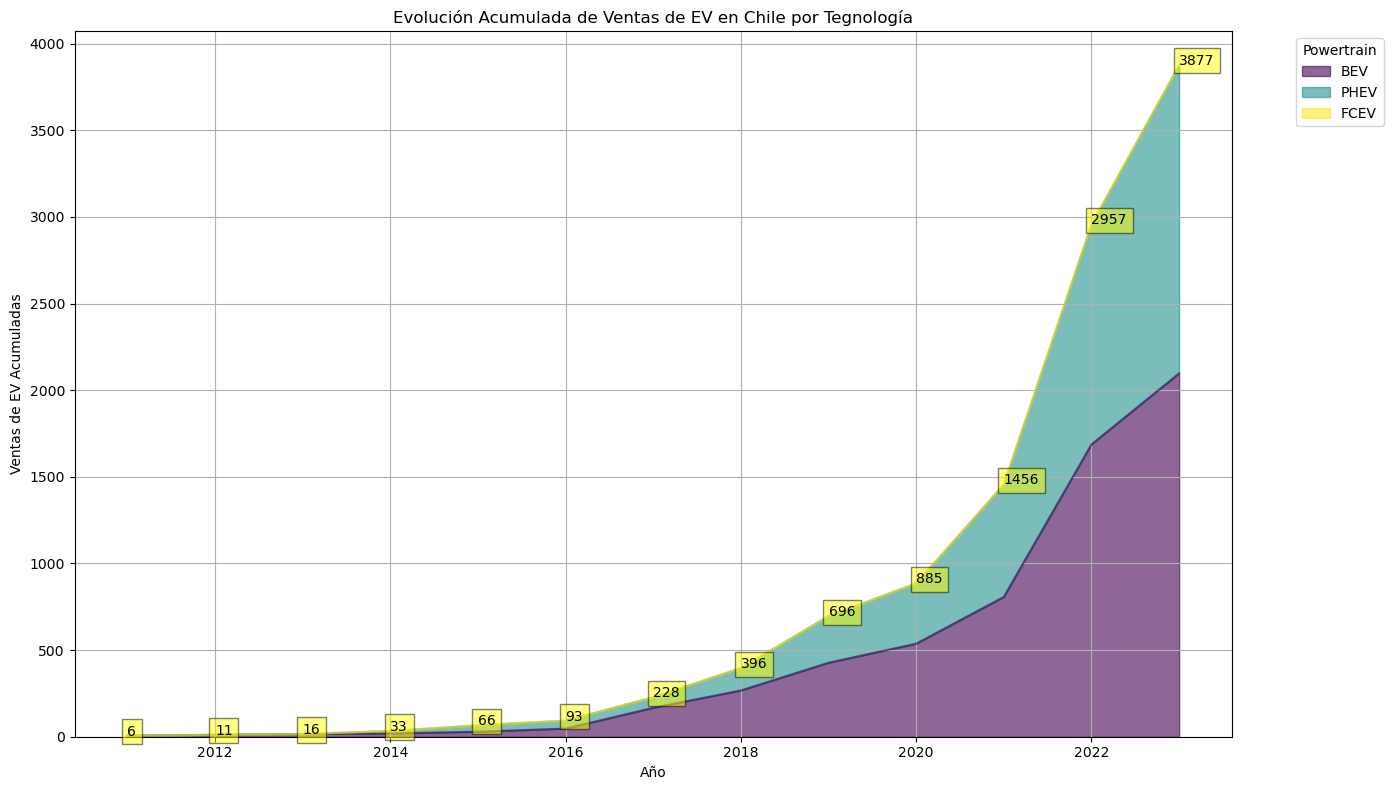

In [281]:
# Agrupar los datos por año y powertrain, y sumar los valores
ev_sales_chile_by_year_powertrain = filtered_ev_sales_chile.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para que las columnas representen los diferentes powertrains
ev_sales_chile_pivot = ev_sales_chile_by_year_powertrain.pivot(index='year', columns='powertrain', values='value').fillna(0)

# Calcular los valores acumulados para cada powertrain
ev_sales_chile_cumsum = ev_sales_chile_pivot.cumsum()

# Ordenar las columnas para que el mayor valor acumulado esté abajo y el menor arriba
final_values = ev_sales_chile_cumsum.iloc[-1].sort_values(ascending=False)
ev_sales_chile_cumsum = ev_sales_chile_cumsum[final_values.index]

# Calcular el valor total acumulado por año
ev_sales_chile_cumsum['Total'] = ev_sales_chile_cumsum.sum(axis=1)

# Crear el gráfico de área apilada
ax = ev_sales_chile_cumsum.drop(columns='Total').plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis', alpha=0.6)

# Añadir etiquetas del valor total acumulado por año
for i in range(len(ev_sales_chile_cumsum)):
    year = ev_sales_chile_cumsum.index[i]
    total_value = ev_sales_chile_cumsum['Total'].iloc[i]
    plt.text(x=year, y=total_value, s=str(int(total_value)), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))

# Personalizar el gráfico
plt.title('Evolución Acumulada de Ventas de EV en Chile por Tegnología')
plt.xlabel('Año')
plt.ylabel('Ventas de EV Acumuladas')
plt.grid(True)
plt.legend(title='Powertrain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Comportamiento de la Infraestructura de Carga en Chile.

El caso de la infraestructura de carga puede analizarse de forma acumulativa donde podemos evidenciar que a final del 2023 el 71% de la infraestructura de carga es del tipo carga lenta, y el 29% corresponde a carga rápida. Recordar que el número de cargadores rápidos es el mayor de America Latina según los datos de la IEA.

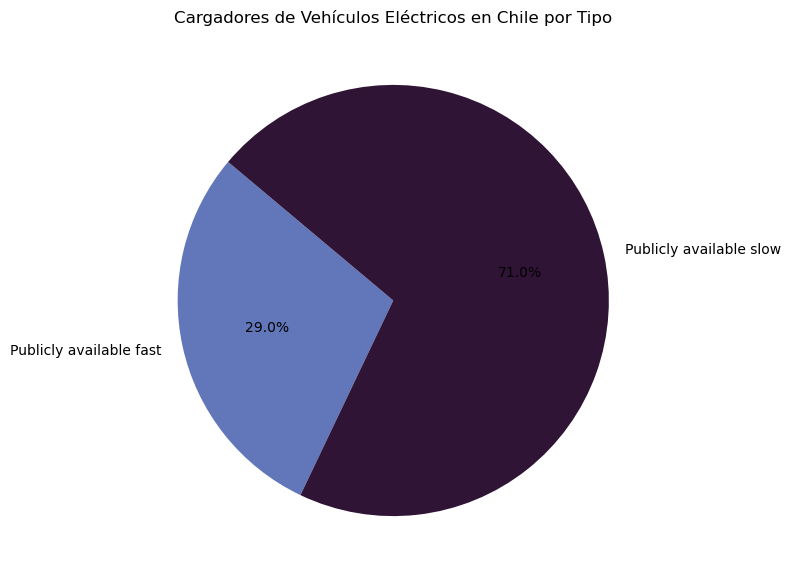

In [258]:
# Filtrar los datos para EV sales en Chile
filtered_ev_charging_chile = df_h[(df_h['parameter'] == 'EV charging points') & (df_h['region'] == 'Chile')]


# Agrupar los datos por 'mode' y sumar las ventas totales
ev_charging_chile_by_mode = filtered_ev_charging_chile.groupby('powertrain')['value'].sum().reset_index()

# Crear el gráfico de torta
plt.figure(figsize=(10, 7))
plt.pie(ev_charging_chile_by_mode['value'], labels=ev_charging_chile_by_mode['powertrain'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("twilight", len(ev_sales_chile_by_mode)))

# Personalizar el gráfico
plt.title('Cargadores de Vehículos Eléctricos en Chile por Tipo')
plt.show()


Si analizamos las instalaciones por año, es posible ver en el siguiente grafico de barras acumuladas, que cada año se aumenta la cantidad de infraestructura instalada, lo que difiere al comportamiento de las ventas de vehículos eléctricos en Chile para el 2023, la que presento una caída con respecto a las ventas del 2022.

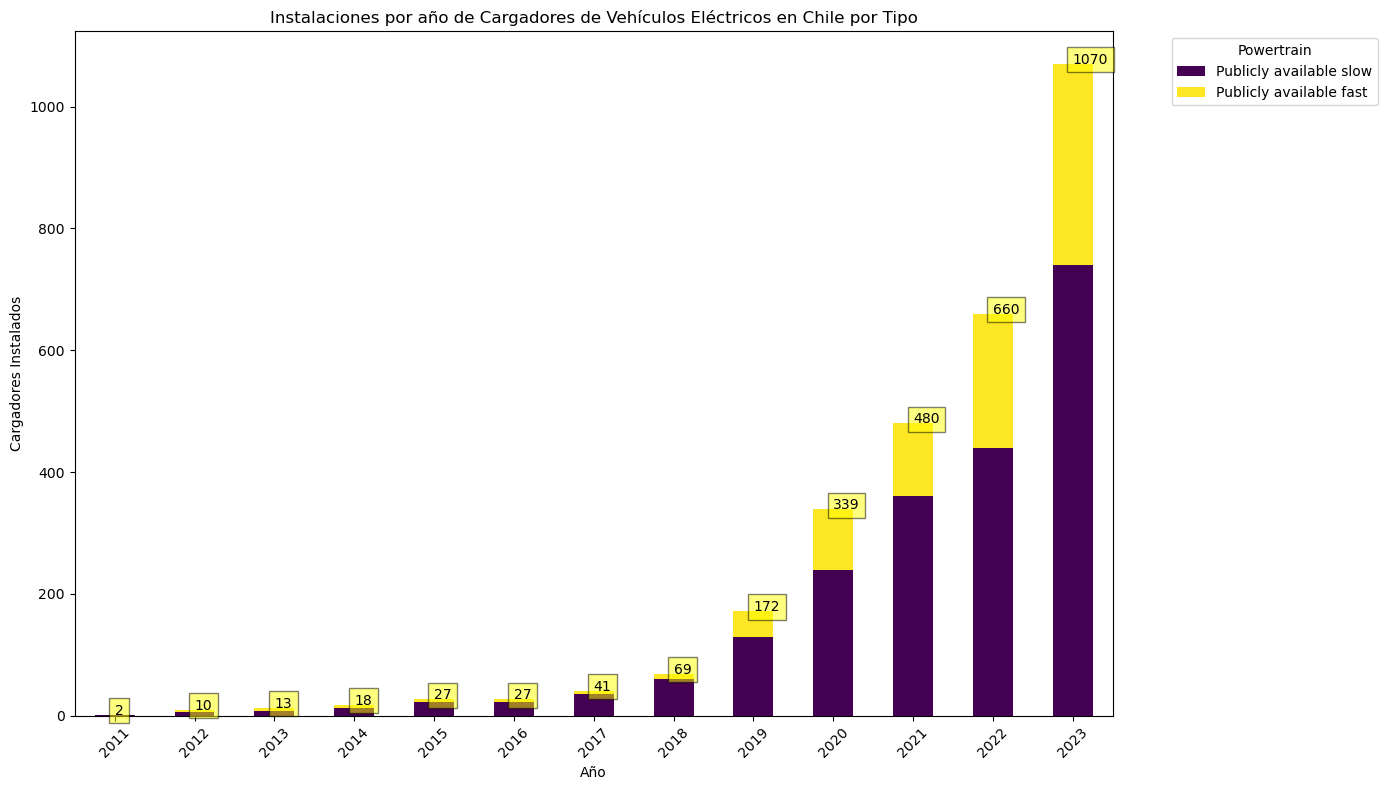

In [289]:
# Agrupar los datos por año y powertrain, y sumar los valores
ev_charging_chile_by_year_powertrain = filtered_ev_charging_chile.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para que las columnas representen los diferentes powertrains
ev_charging_chile_pivot = ev_charging_chile_by_year_powertrain.pivot(index='year', columns='powertrain', values='value').fillna(0)

# Ordenar las columnas para que el mayor valor acumulado esté abajo y el menor arriba
final_values = ev_charging_chile_pivot.sum().sort_values(ascending=False)
ev_charging_chile_pivot = ev_charging_chile_pivot[final_values.index]

# Crear el gráfico de barras apiladas
ax = ev_charging_chile_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Añadir etiquetas del valor total por año
totals = ev_charging_chile_pivot.sum(axis=1)
for i in range(len(totals)):
    plt.text(x=i, y=totals.iloc[i], s=str(int(totals.iloc[i])), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))


plt.title('Instalaciones por año de Cargadores de Vehículos Eléctricos en Chile por Tipo')
plt.xlabel('Año')
plt.ylabel('Cargadores Instalados')
plt.xticks(rotation=45)
plt.legend(title='Powertrain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El valor acumulado de los puntos de recargas en Chile llegan a los 2928 cargadores al cierre del 2023 según los datos de la IEA.

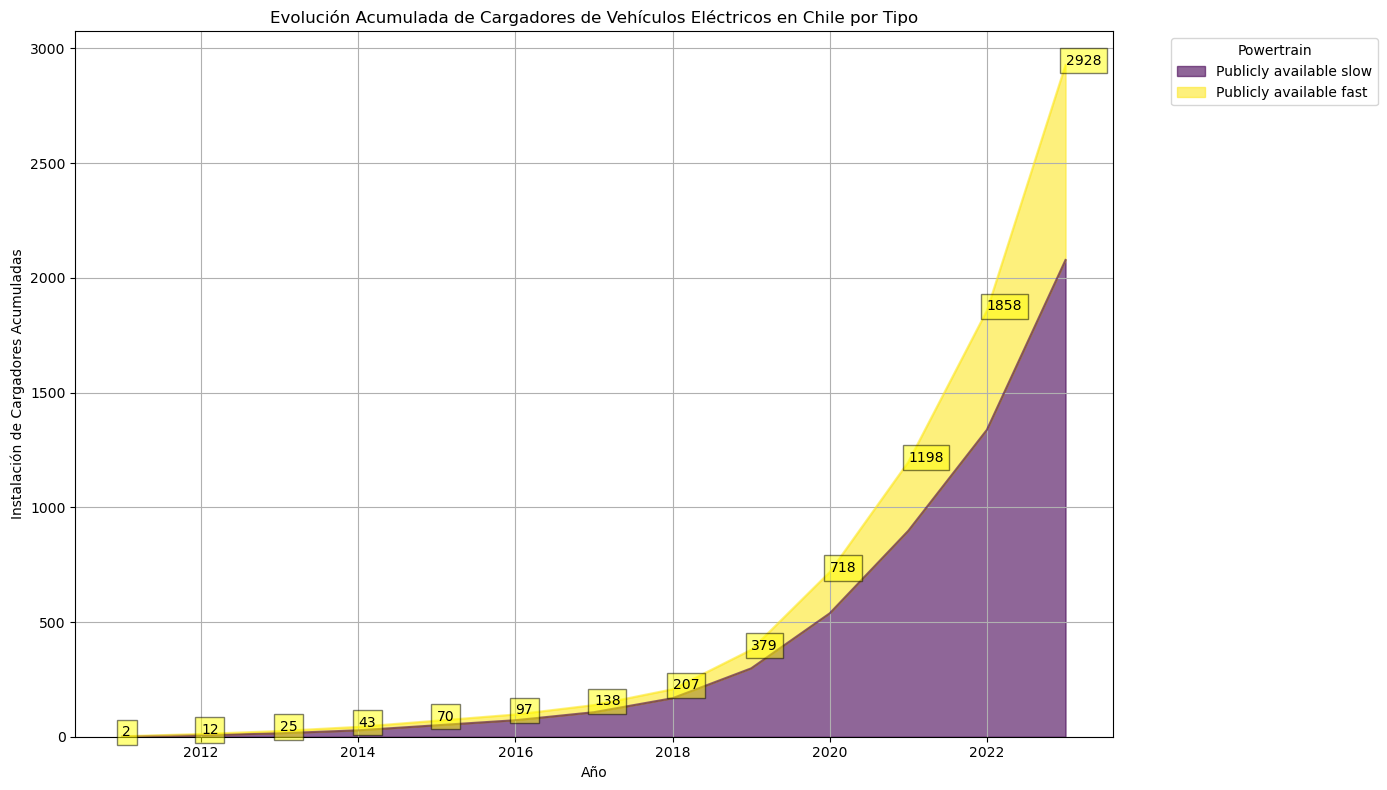

In [287]:
# Agrupar los datos por año y powertrain, y sumar los valores
ev_charging_chile_by_year_powertrain = filtered_ev_charging_chile.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Pivotar los datos para que las columnas representen los diferentes powertrains
ev_charging_chile_pivot = ev_charging_chile_by_year_powertrain.pivot(index='year', columns='powertrain', values='value').fillna(0)

# Calcular los valores acumulados para cada powertrain
ev_charging_chile_cumsum = ev_charging_chile_pivot.cumsum()

# Ordenar las columnas para que el mayor valor acumulado esté abajo y el menor arriba
final_values = ev_charging_chile_cumsum.iloc[-1].sort_values(ascending=False)
ev_charging_chile_cumsum = ev_charging_chile_cumsum[final_values.index]

# Calcular el valor total acumulado por año
ev_charging_chile_cumsum['Total'] = ev_charging_chile_cumsum.sum(axis=1)

# Crear el gráfico de área apilada
ax = ev_charging_chile_cumsum.drop(columns='Total').plot(kind='area', stacked=True, figsize=(14, 8), colormap='viridis', alpha=0.6)

# Añadir etiquetas del valor total acumulado por año
for i in range(len(ev_charging_chile_cumsum)):
    year = ev_charging_chile_cumsum.index[i]
    total_value = ev_charging_chile_cumsum['Total'].iloc[i]
    plt.text(x=year, y=total_value, s=str(int(total_value)), fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))


plt.title('Evolución Acumulada de Cargadores de Vehículos Eléctricos en Chile por Tipo')
plt.xlabel('Año')
plt.ylabel('Instalación de Cargadores Acumuladas')
plt.grid(True)
plt.legend(title='Powertrain', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Para verificar si la instalación de puntos de cargas públicos va en la misma tendencia de las ventas de vehículos eléctricos, se realiza un gráfico de dispersión para verificar la correlación de los datos, donde se ve que en los últimos años se presentó una variación producto de los cambios en las ventas de vehículos en el periodo 2022 y 2023 

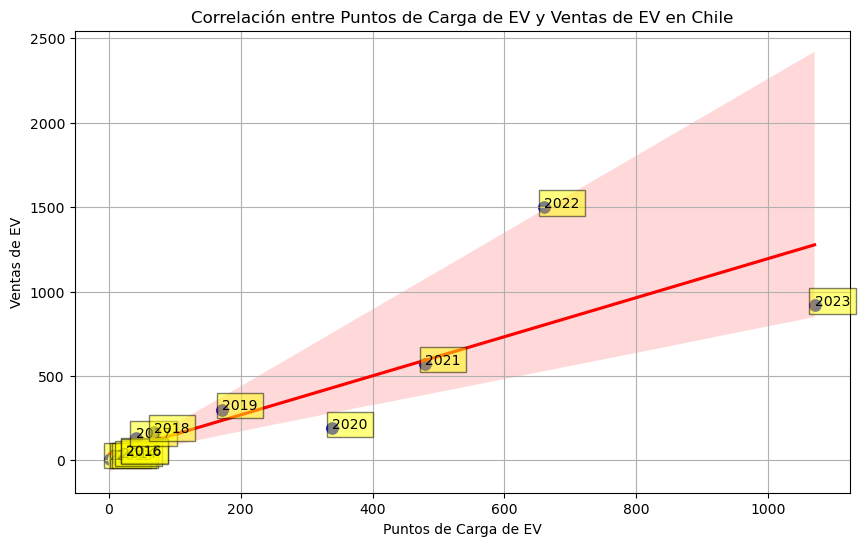

In [83]:

# Filtrar los datos para Chile
filtered_chile = df_h[df_h['region'] == 'Chile']

# Filtrar los datos para EV sales y EV charging points
ev_sales_chile = filtered_chile[filtered_chile['parameter'] == 'EV sales']
ev_charging_chile = filtered_chile[filtered_chile['parameter'] == 'EV charging points']

# Agrupar los datos por año y sumar los valores
ev_sales_chile_by_year = ev_sales_chile.groupby('year')['value'].sum().reset_index()
ev_charging_chile_by_year = ev_charging_chile.groupby('year')['value'].sum().reset_index()

# Combinar los dos DataFrames en uno solo
combined_chile = pd.merge(ev_sales_chile_by_year, ev_charging_chile_by_year, on='year', suffixes=('_sales', '_charging'))

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value_charging', y='value_sales', data=combined_chile, s=100, color='blue')

# Añadir una línea de regresión
sns.regplot(x='value_charging', y='value_sales', data=combined_chile, scatter=False, color='red')

# Añadir etiquetas de año a los puntos
for i in range(combined_chile.shape[0]):
    plt.text(x=combined_chile['value_charging'][i], y=combined_chile['value_sales'][i], s=combined_chile['year'][i], 
             fontdict=dict(color='black', size=10), bbox=dict(facecolor='yellow', alpha=0.5))


plt.title('Correlación entre Puntos de Carga de EV y Ventas de EV en Chile')
plt.xlabel('Puntos de Carga de EV')
plt.ylabel('Ventas de EV')
plt.grid(True)
plt.show()